<h2>Analyzing European Food Consumption Dataset</h2>
<p>In this notebook, we will implement and utilize a scratch implementation of Principal Component Analysis (PCA) in
order to conduct exploratory data analysis on the European Food Comsumption dataset. The dataset itself contained in the file "food-consumption.csv", contains data on 16 European countries and their respective consumption levels of 20 food items such as tea, jam, coffee, yogurt, and many more. </p>

---

First, we load up our basic python libraries needed to read in our data, create visualizations, and implement our PCA function in a computationally efficent way. These libraries used are as follows:

- Numpy: The numpy module provides all of the array and vectorization functionality we will use in implementing our PCA function in a comutational and memory efficent way.
- Pandas: The pandas library contains several utility functions for loading data and storing it as a dataframe. This comes in handy with this dataset given the named columns, and the fact that we wish to analyze the dataset both from the country persepective as well as the food persepective. Utilizing dataframes will make the columns and related analysis much easier to track and implement.
- Matplotlib: The matplotlib library is key to visualization in python and will allow us to create meaningful and insightful charts that tell our data's story.

The following code cell loads each of these neccecary libraries:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


---

Now that we have all our neccecary libraries imported we can move onto loading in our dataset. We will load the data using pandas and display the data as a dataframe using the following code cell. 



In [2]:
food_df = pd.read_csv('food-consumption.csv')
country_names = food_df['Country'].values
food_names = food_df.columns.values[1:]
food_df 

,Country,Real coffee,Instant coffee,Tea,Sweetener,Biscuits,Powder soup,Tin soup,Potatoes,Frozen fish,...,Apples,Oranges,Tinned fruit,Jam,Garlic,Butter,Margarine,Olive oil,Yoghurt,Crisp bread
0,Germany,90,49,88,19,57,51,19,21,27,...,81,75,44,71,22,91,85,74,30,26
1,Italy,82,10,60,2,55,41,3,2,4,...,67,71,9,46,80,66,24,94,5,18
2,France,88,42,63,4,76,53,11,23,11,...,87,84,40,45,88,94,47,36,57,3
3,Holland,96,62,98,32,62,67,43,7,14,...,83,89,61,81,15,31,97,13,53,15
4,Belgium,94,38,48,11,74,37,23,9,13,...,76,76,42,57,29,84,80,83,20,5
5,Luxembourg,97,61,86,28,79,73,12,7,26,...,85,94,83,20,91,94,94,84,31,24
6,England,27,86,99,22,91,55,76,17,20,...,76,68,89,91,11,95,94,57,11,28
7,Portugal,72,26,77,2,22,34,1,5,20,...,22,51,8,16,89,65,78,92,6,9
8,Austria,55,31,61,15,29,33,1,5,15,...,49,42,14,41,51,51,72,28,13,11
9,Switzerland,73,72,85,25,31,69,10,17,19,...,79,70,46,61,64,82,48,61,48,30


Notice that in the code above, we also create two new variables "food_names" and "country_names" by extraing these strings from the dataframe columns and index names. This was done now so that later in our analsis we already have a list of all our variable names to easily pull and reference our dataframe with. Now that we have our dataset loaded correctly, we move onto the more technical aspect of this report which is explaining and implementing PCA. 

---

However, before we start with the implementation, lets go over some of the basics of what PCA is. Principal component analysis is a popular approach for deriving a low-dimensional set of features from a large set of variables also known as dimensionality reduction. The utility of PCA can vary widely by application, but works exceptionally well when a dataset with high dimensionality has a natural low dimensional structure. PCA's goal is to find this low dimensional manifold embedded within the space of our dataset that can represent the origonal dataset with far less features. This feature reduction can aid in sub-sequent statistical modeling whereby we lessen the impact incurred from the curse of dimensionality. From a mathematical perspective, PCA is defined as the orthogonal projection of the data onto a lower dimensional linear space, known as the principal sub-space, such that the variance of the projected data is maximized . 

The General PCA optimization problem can be represented by the following equation where we aim to maximize variance subject to constraints:

$$\max\limits_{w:||w||\le1} w^T C w, \ C = \frac{1}{m} \sum_{i=1}^{m} (x^i - \mu) (x^i -\mu)^T$$

where $C$ is the covariance matrix and $w$ is an unit vector.

Forming the Lagrangian function of the above optimization problem we can better account for the constraints on $w: ||w|| \le 1$ such that the problem now takes the form:

$$L(w,\lambda) = w^T C w + \lambda (1 - ||w||^2) $$

Since $w$ is the maximum of the original optimzation problem, there exists a $\lambda$ where $(w,\lambda)$ is a stationary point of $L(w,\lambda)$. This implies the following:

$$\frac{\partial L}{\partial w} = 0 = 2Cw - 2 \lambda w \leftrightarrow Cw = \lambda w $$

The result of this algebraic manipulation yields a familiar result: $Cw = \lambda w$ which is immediately recognizable as an eigendecomposition problem where the optimal solution $w$ should be an eigenvector associated with the eigenvalue $\lambda$. This eigenvector $w$ will also be an eigenvector of $C$. 

The objective function thus becomes:

$$w^T C w = \lambda w^T w = \lambda ||w||^2 $$

Now the problem has become finding the largest eigenvalue of $C$ corresponding to its respective eigenvector $w^1$ pair, which together allow us to solve for our first principal component after projecting onto the original data matrix. 

The remaining principal component vectors are then found by incrementally by finding and sorting the descending eigenvalues of $C$ each of these eigenvalues $\lambda^2 ... \lambda^k$ will have a corresponding eigenvector of $C$ as we saw above which would be denoted $w^2 ... w^k$ respectively. Each of these vectors if corresponding to the proper ordering of descending eigenvalues will be orthogonal to one another maximizing variance in this orthogonal direction, respectively.

This type of problem can be sovled efficently via Singular value decompostion of our centered covariance matrix $C$. 

Now that we understand the PCA problem from a mathematical perspective, lets utilize this knowlege to implement and find the first $k=2$ Principal Component vectors of our food dataset. We will first be applying PCA with respect to the Food items first. In order to do this we first create a transposed version of our dataframe which gives us a row-wise feature and column wise sample structure. We also convert this new dataframe into a numpy array and apply centering of the features.

In [3]:
foodT = np.array(food_df)[:,1:].astype(float).T
foodT_mean = np.expand_dims(np.average(foodT,axis=1),axis=1)
foodT_centered = foodT - foodT_mean

Now that we have our new array "foodT_centered" which represents our centered dataset, we create the $C$ matrix needed by our PCA formulation. This H matrix will be the primary object that we apply Singular Value Decomposition which will be our method of implementing PCA. This $C$ matrix is fundementally our centered covariance matrix of our data array.

In [4]:
hcov_FoodT = np.dot(foodT_centered,foodT_centered.T) / foodT_centered.shape[1]
labels_f = food_names
labels_c = country_names
U_FoodT,Sigma_FoodT,V_FoodT = np.linalg.svd(hcov_FoodT)

Now that we have applied SVD to our centered covariance matrix we have three key outputs:

1) Left Unitary array: U_FoodT
2) Right Unitary array: V_FoodT
3) Eigenvalues: Sigma_FoodT

For a sanity check let's visualize our Sigma vector which contains our resulting eigenvalues. When plotted, we should see a sharply downward sloping plot which illustrates that for the first few Prinicpal components our eigenvalues are large indicating that they capture a large amount of variance. However, the amount of variance captured by each subsequent principal component should be decreasing with only the first few eigenvalues being of significatly large magnitude.

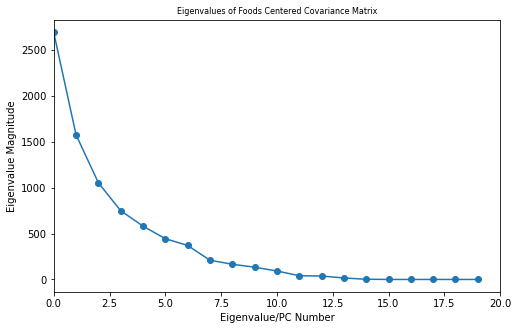

In [7]:
fig,ax = plt.subplots(figsize=(8,5))
ax.plot(np.arange(0,Sigma_FoodT.shape[0]),Sigma_FoodT)
ax.scatter(np.arange(0,Sigma_FoodT.shape[0]),Sigma_FoodT)
ax.set_xlim([0,20])
ax.set_title('Eigenvalues of Foods Centered Covariance Matrix',fontsize=8)
ax.set_ylabel('Eigenvalue Magnitude')
ax.set_xlabel('Eigenvalue/PC Number')
plt.show()

With our eigenvectors now identified, we can begin to inspect them more generally as weight vectors. We can examine these weights through the stem plot below, which has each weight annotated to show its corresponding food type.


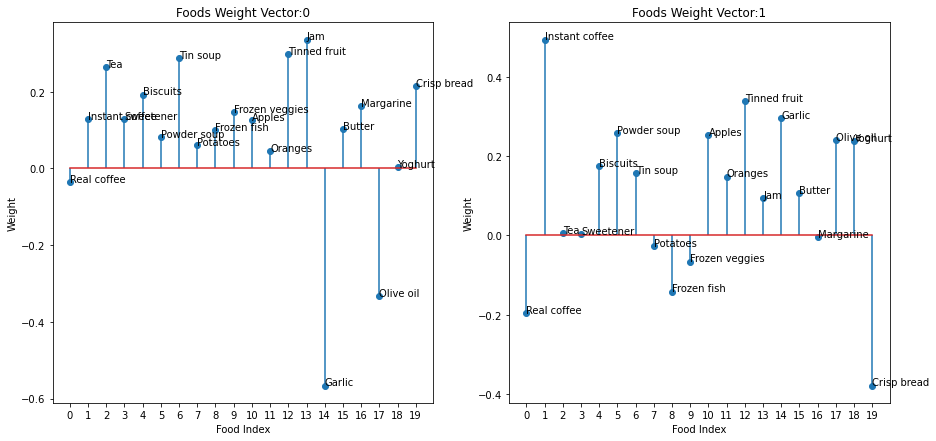

In [35]:
k=2
food_fig,food_axes = plt.subplots(nrows=1,ncols=2,figsize=(15,7))
for j in range(k):
    food_axes[j].stem(np.arange(0,hcov_FoodT.shape[0]), V_FoodT[j,:])
    title_string = 'Foods Weight Vector:' + str(j)
    food_axes[j].set_title(title_string)
    food_axes[j].set_xlabel('Food Index')
    food_axes[j].set_ylabel('Weight')
    food_axes[j].set_xticks(np.arange(0,hcov_FoodT.shape[0]))
    for x,y,label in zip(np.arange(0,hcov_FoodT.shape[0]), V_FoodT[j,:],labels_f):
        food_axes[j].annotate(label,xy=(x,y))
plt.show()

It would further the analysis to view these weights in the form of absolute value of weights as magnitude is what really matters to each given relationship. This form is given by taking the absolute value of each weight vector and again plotting to a stem chart as shown below:


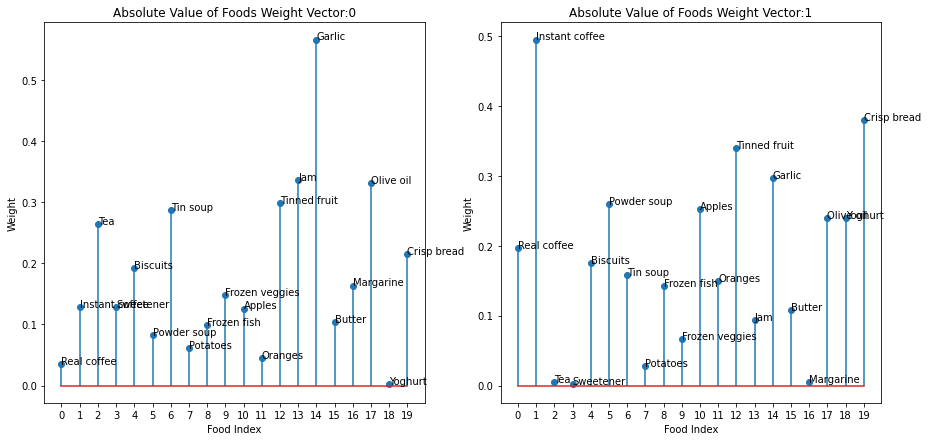

In [34]:
food_fig2,food_axes2 = plt.subplots(nrows=1,ncols=2,figsize=(15,7))
for j in range(k):
    food_axes2[j].stem(np.arange(0,hcov_FoodT.shape[0]), np.abs(V_FoodT[j,:]))
    title_string = 'Absolute Value of Foods Weight Vector:' + str(j)
    food_axes2[j].set_title(title_string)
    food_axes2[j].set_xlabel('Food Index')
    food_axes2[j].set_ylabel('Weight')
    food_axes2[j].set_xticks(np.arange(0,hcov_FoodT.shape[0]))
    for x,y,label in zip(np.arange(0,hcov_FoodT.shape[0]),np.abs(V_FoodT[j,:]),labels_f):
        food_axes2[j].annotate(label,xy=(x,y))
plt.show()

As we can see from the outputs above, it appears that in weight vector zero (eigenvector 0) the foods garlic, olive oil, and jam seem to be the most highly weighted components. It is notable however, that jam and garlic have opposing signs meaning this weight vector will expand the variance along this projection by creating divergence between these two food items. We see a similar relationship in weight vector one in the form of instant coffee and crisp bread. Thus along the projection created from weight vector 1 we can expect to see quite a bit of variance emerging form these two categories and their differences which hopefully will allow us to better separate our data.

---

We can now transform these weight vectors into their respective principal component representations, plot their projections, and label their corresponding entries by using our left and right unitary matricies along with our eigenvalues to reconstruct the dataset. By truncating our unitrary matricies and eignenvalues to only the $k$ first columns, we achieve a $k$ pricipal component decomposition allowing us the reconstruct the original dataset with lower dimnesionality. We can start by applying $k=2$ PCA to the dataset and graphing these resulting 2 principal components (PC1 and PC2 respectively) on a scatter plot to better understand the low dimensional structure of our reconstructed dataset. This visualization will yield insight into the distance/similarity of the various countries diets.

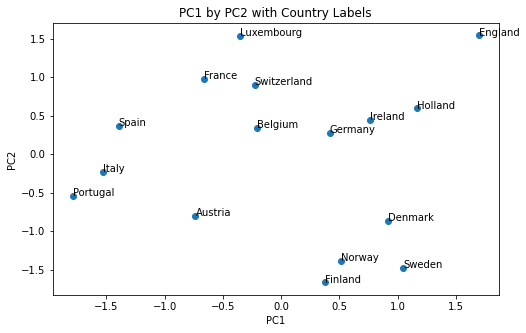

In [11]:
Sigma_FoodT_ks = Sigma_FoodT[0:2]
FoodT_k_eigs = V_FoodT[0:2,:]
foodT_PC_1 = FoodT_k_eigs[0,:].T.dot(foodT_centered) / np.sqrt(Sigma_FoodT_ks[0]) 
foodT_PC_2 = FoodT_k_eigs[1,:].T.dot(foodT_centered) / np.sqrt(Sigma_FoodT_ks[1])
fig,ax = plt.subplots(figsize=(8,5))
ax.scatter(foodT_PC_1, foodT_PC_2)
for x, y, label in zip(foodT_PC_1, foodT_PC_2, labels_c):
    ax.annotate(label, xy=(x, y))
ax = plt.gca()
ax.set_title('PC1 by PC2 with Country Labels')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
plt.show()

As seen in the output above, we were able to reduce our initial feature space into just 2 dimensions of which we can now easily plot and visualize both with respect to one another due to our PCA properties of orthogonality. The graph yields some very interesting results given which countries are clustered together, and additional insight when comparing each country's position relative to each axis with the food weights. For example, we can see that in the extreme left of PC1 we have Spain, Italy, and Portugal all grouped tightly together. This makes sense as they all take on high consumptions of either olive oil or garlic or both which in weight vector 0 all had relatively high negative magnitudes for those categories. 

Additionally, take note of England in the upper right corner of the graph extreme in both PC1 and PC2. As we would expect the corresponding weight vectors 0 and 1 have high marks for tea and jam as well as instant coffee, respectively. Each of these are areas England is known for and scored especially high in when looking at the original data. Of final note, I found it immensely interesting that despite having no information about physical geography input into the data frame, the PCA implementation graph has some distinct clusters of countries that happen to be physically close to one another geographically. I believe this is not at all coincidence as counties that are in closer proximity to one another are probably more likely to share similar climates, customs, and ultimately food preferences as the cultures trade and interact more closely with one another. Although this is strictly speculation it sounds to be an interesting area of potential further investigation.


---


Now that we have applied PCA from the food perspecitve let's traonspose our dataframe and conduct the same analysis from the country perspective. The cell below uses the initial data frame construction without transposition as this is the form that allows our rows of countries to represent feature vectors (the dimensionality of which we aim to reduce), and foods as our samples in column form.

In [12]:
food = np.array(food_df)[:,1:].astype(float)
food_mean = np.expand_dims(np.average(food,axis=1),axis=1)
food_centered = food - food_mean
hcov_Food = np.dot(food_centered,food_centered.T) / food_centered.shape[1]
labels_f = food_names
labels_c = country_names
U_Food,Sigma_Food,V_Food = np.linalg.svd(hcov_Food)
Sigma_Food_ks = Sigma_Food[0:2]
Food_k_eigs = V_Food[0:2,:]
food_PC_1 = Food_k_eigs[0,:].T.dot(food_centered) / np.sqrt(Sigma_Food_ks[0])
food_PC_2 = Food_k_eigs[1,:].T.dot(food_centered) / np.sqrt(Sigma_Food_ks[1])

The cell below plots our resulting eigen-values derived from the SVD of our covariance matrix and plots them. This is a good way to verify our eigen-values are in proper descending order by value.


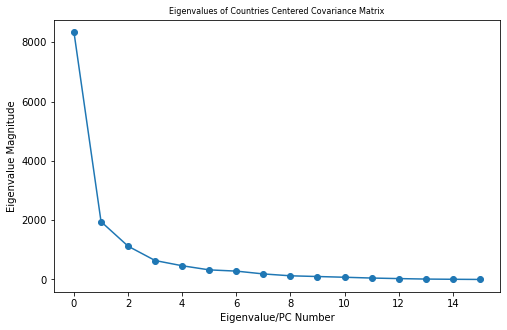

In [22]:
fig,ax = plt.subplots(figsize=(8,5))
ax.plot(np.arange(0,Sigma_Food.shape[0]),Sigma_Food)
ax.scatter(np.arange(0,Sigma_Food.shape[0]),Sigma_Food)
ax.set_title('Eigenvalues of Countries Centered Covariance Matrix',fontsize=8)
ax.set_ylabel('Eigenvalue Magnitude')
ax.set_xlabel('Eigenvalue/PC Number')
plt.show()

With our eigenvectors now identified, we can begin to inspect them more generally as weight vectors as we did before. The results are output below:

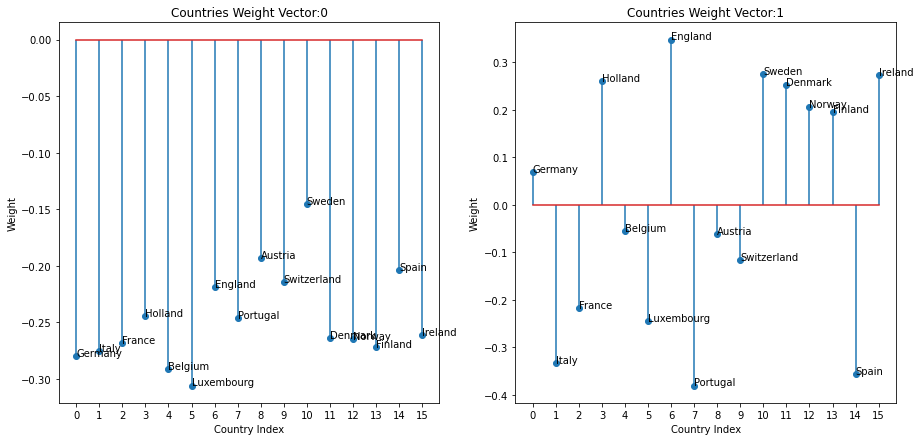

In [33]:
fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(15,7))
for j in range(k):
    axes[j].stem(np.arange(0,hcov_Food.shape[0]), V_Food[j,:])
    title_string = 'Countries Weight Vector:' + str(j)
    axes[j].set_title(title_string)
    axes[j].set_xlabel('Country Index')
    axes[j].set_ylabel('Weight')
    axes[j].set_xticks(range(0,len(labels_c)))
    for x,y,label in zip(np.arange(0,hcov_Food.shape[0]), V_Food[j,:],labels_c):
        axes[j].annotate(label,xy=(x,y))
plt.show()

It would further the analysis to view these weights in the form of absolute value of weights as magnitude is what really matters to each given relationship. Below are the absolute value stem plots of the weight vectors:


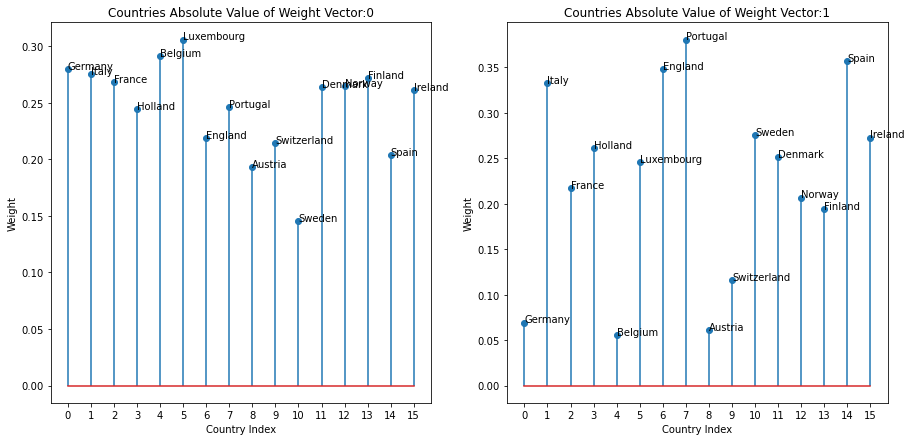

In [32]:
fig1, axes1 = plt.subplots(nrows=1,ncols=2,figsize=(15,7))
for j in range(k):
    axes1[j].stem(np.arange(0,hcov_Food.shape[0]), np.abs(V_Food[j,:]))
    title_string = 'Countries Absolute Value of Weight Vector:' + str(j)
    axes1[j].set_title(title_string)
    axes1[j].set_xlabel('Country Index')
    axes1[j].set_xticks(range(0,len(labels_c)))
    axes1[j].set_ylabel('Weight')
    for x,y,label in zip(np.arange(0,hcov_Food.shape[0]),np.abs(V_Food[j,:]),labels_c):
        axes1[j].annotate(label,xy=(x,y))
plt.show()

We can now transform these weight vectors into principal component representations and label their corresponding entries just as we did before. The results are the following:

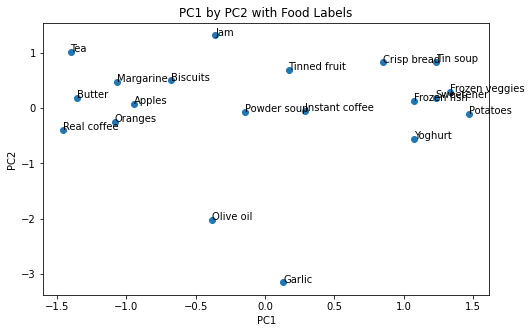

In [36]:
fig,ax = plt.subplots(figsize=(8,5))
ax.scatter(food_PC_1, food_PC_2)
for x, y, label in zip(food_PC_1, food_PC_2, labels_f):
    ax.annotate(label, xy=(x, y))
ax = plt.gca()
ax.set_title('PC1 by PC2 with Food Labels')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
plt.show()

In examining all our above outputs, we can begin by noting the interesting behavior of weight vector 0 which unlike our previous weight vector 0 in the previous PCA implementation, contains all negative values. Although sign flips are common in eigen decomposition and are essentially meaningless so long as they interpreted properly with respect to magnitude as well as other entries in the vector. Initially, I thought there was a bug in my code which caused this, but on further investigation this is a feasible outcome for an eigenvector as this is the representation that in fact maximized the variance among the feature space. Weight vector 0 can be looked at strictly in magnitude perspective where we see that Luxembourg and Belgium seems to be separated from the likes of Sweden, Austria, and Spain. 

In looking at weight vector 1 we again see our weight vector take on the behavior seen in the prior PCA implementation with both positive and negative values. In the extremes of the stem plots we can observe England, Ireland, and Holland each taking differing signs with equal magnitudes of Spain, Italy, and Portugal. It is notable that these three countries were a cluster we examined in the prior analysis although from a different perspective as outputs rather than weight. However, it is important to note that both implementations although opposites will have some commonalities. Such commonalities are especially apparent in viewing the final plot with the corresponding food labels. Notably, garlic and olive oil again find themselves rather clustered together separated from the rest of the data cloud a relationship that was noted in the prior implementation as well.

 Additionally, we again see some of that behavior in the placement jam and tea also noted in the prior implementation. Finally, looking at the plot standalone it is interesting that we see large seperation between frozen veggies/frozen fruit and fresh fruits (Apples/Oranges) in respect to their extreme positions in PC1. Although again strictly speculation, one could make the case that these goods are in-fact substitutes. Logic would tell us that in places where fresh fruit is unavailable due to poor agricultural conditions frozen fruit could be imported, and in places where fruit is plentiful the locals would feel no need to freeze and preserve any of these fruits. Again, these are just preliminary insights gleaned from a single analytics method, but for the methods general simplicity it yields quite effective and interesting insights.
